In [2]:
#!pip install ..
!pip install emoji
import emoji

!pip list

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.3 MB/s eta 0:00:00
Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.15
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.31.0.36.18
astunparse                         1.6.3
atpublic              

In [3]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')


my_local_drive='/content/gdrive/My Drive/Colab Notebooks/PROJET_ML'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/PROJET_ML


'/content/gdrive/My Drive/Colab Notebooks/PROJET_ML'

### Lecture du fichier afin de prendre connaissances des données

In [5]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())

Unnamed: 0            tweet_id  \
0           0  316669998137483264   
1           1  319090866545385472   
2           2  322030931022065664   
3           3  322694830620807168   
4           4  328524426658328576   

                                                text  science_related  \
0  Knees are a bit sore. i guess that's a sign th...                0   
1          McDonald's breakfast stop then the gym 🏀💪                0   
2  Can any Gynecologist with Cancer Experience ex...                1   
3  Couch-lock highs lead to sleeping in the couch...                1   
4  Does daily routine help prevent problems with ...                1   

   scientific_claim  scientific_reference  scientific_context  
0               0.0                   0.0                 0.0  
1               0.0                   0.0                 0.0  
2               1.0                   0.0                 0.0  
3               1.0                   0.0                 0.0  
4               1.0                   0.0                 0.0

In [6]:
print("Taille du DataFrame :", df.shape) # nb de lignes et colonnes

print("\nSix premières lignes :\n")
display(df.head(6))

print("\nTrois dernières lignes :\n")
display(df.tail(3))

print("\nCinq lignes au hasard :\n")
display(df.sample(5))



Taille du DataFrame : (1140, 7)

Six premières lignes :



Unnamed: 0            tweet_id  \
0           0  316669998137483264   
1           1  319090866545385472   
2           2  322030931022065664   
3           3  322694830620807168   
4           4  328524426658328576   
5           6  331396203700944896   

                                                text  science_related  \
0  Knees are a bit sore. i guess that's a sign th...                0   
1          McDonald's breakfast stop then the gym 🏀💪                0   
2  Can any Gynecologist with Cancer Experience ex...                1   
3  Couch-lock highs lead to sleeping in the couch...                1   
4  Does daily routine help prevent problems with ...                1   
5  The Impact of Infertility on You and Your Rela...                0   

   scientific_claim  scientific_reference  scientific_context  
0               0.0                   0.0                 0.0  
1               0.0                   0.0                 0.0  
2               1.0                   0.0                 0.0  
3               1.0                   0.0                 0.0  
4               1.0                   0.0                 0.0  
5               0.0                   0.0                 0.0


Trois dernières lignes :



Unnamed: 0             tweet_id  \
1137        1258  1341155832793165825   
1138        1259  1344167355648241664   
1139        1260  1344485313222041600   

                                                   text  science_related  \
1137         Whats the uber support team email address?                0   
1138  House passes bill to increase stimulus checks ...                0   
1139  @berriemoomin #런쥔을_공평하게_대하세요 Renjun deserve be...                0   

      scientific_claim  scientific_reference  scientific_context  
1137               0.0                   0.0                 0.0  
1138               0.0                   0.0                 0.0  
1139               0.0                   0.0                 0.0


Cinq lignes au hasard :



Unnamed: 0             tweet_id  \
435         472   739700826453741568   
182         199   520620915722182656   
933        1028  1171510188160864257   
518         563   808672080690483200   
717         793   982392279456473088   

                                                  text  science_related  \
435  #Renewableenergy surges to record levels aroun...                1   
182  not a full extend bro stop “@AchaFlocka: “@MyS...                0   
933  Imagine singing a Communist song in the Britis...                0   
518  What satellites can tell us about how animals ...                1   
717  How to gain twice as much as your opponent in ...                1   

     scientific_claim  scientific_reference  scientific_context  
435               1.0                   1.0                 1.0  
182               0.0                   0.0                 0.0  
933               0.0                   0.0                 0.0  
518               0.0                   1.0                 1.0  
717               0.0                   1.0                 1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1140 non-null   int64  
 1   tweet_id              1140 non-null   int64  
 2   text                  1140 non-null   object 
 3   science_related       1140 non-null   int64  
 4   scientific_claim      1140 non-null   float64
 5   scientific_reference  1140 non-null   float64
 6   scientific_context    1140 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 62.5+ KB


In [ ]:
nb_SC = df[df["science_related"] == 1]["science_related"].count()
nb_non_SC = df[df["science_related"] == 0]["science_related"].count()

display(f"Nombre de tweets scientifiques : {nb_SC} ")
display(f"Nombre de tweets non scientifiques : {nb_non_SC}")

'Nombre de tweets scientifiques : 375 '

'Nombre de tweets non scientifiques : 765'

In [ ]:
sc_bool = df[df["science_related"] == 1]

nb_claim = sc_bool[sc_bool["scientific_claim"] == 1.0]["tweet_id"].count()
nb_ref = sc_bool[sc_bool["scientific_reference"] == 1.0]["tweet_id"].count()
nb_context = sc_bool[sc_bool["scientific_context"] == 1.0]["tweet_id"].count()

nb_claim_ref = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()
nb_claim_context = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()
nb_context_ref = sc_bool[(sc_bool["scientific_context"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()

nb_total = sc_bool[(sc_bool["scientific_claim"] == 1.0) |
                   (sc_bool["scientific_reference"] == 1.0) |
                   (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()


print(f"Nombre de tweets CLAIM : {nb_claim}")
print(f"Nombre de tweets REFERENCE : {nb_ref}")
print(f"Nombre de tweets CONTEXT : {nb_context}")
print(f"Nombre de tweets CLAIM & REF : {nb_claim_ref}")
print(f"Nombre de tweets CLAIM & CONTEXT : {nb_claim_context}")
print(f"Nombre de tweets CONTEXT & REF : {nb_context_ref}")
print(f"Nombre total de tweets ayant au moins une catégorie : {nb_total}")




Nombre de tweets CLAIM : 263
Nombre de tweets REFERENCE : 203
Nombre de tweets CONTEXT : 251
Nombre de tweets CLAIM & REF : 124
Nombre de tweets CLAIM & CONTEXT : 139
Nombre de tweets CONTEXT & REF : 203
Nombre total de tweets ayant au moins une catégorie : 375


In [ ]:
import re
import emoji

def convert_emojis(text):
    return emoji.demojize(text)  # Convertit 😊 en :smiling_face_with_smiling_eyes:

df['text'] = df['text'].apply(convert_emojis)

# Détection d’URL "normaux"
df['has_url'] = df['text'].str.contains(r'http[s]?://', regex=True)

# Détection d’URL "réponse à des tweets"
df['has_url_tweet'] = df['text'].str.contains(r'http[s]?://t.co/', regex=True)

# Détection de mentions (@username)
df['has_mention'] = df['text'].str.contains(r'@\w+', regex=True)

# Détection de hashtags (#mot)
df['has_hashtag'] = df['text'].str.contains(r'#\w+', regex=True)

# détection emojis
df['has_emoji'] = df['text'].str.contains(r':[^:\s]+:')

# Fonction d’agrégation
def count_by_category(col):
    return df.groupby('science_related')[col].sum()

print("📌 Tweets avec URL :")
display(count_by_category('has_url'))

print("📌 Tweets avec URL de tweets:")
display(count_by_category('has_url_tweet'))

print("📌 Tweets avec Mention :")
display(count_by_category('has_mention'))

print("📌 Tweets avec Hashtag :")
display(count_by_category('has_hashtag'))

print("📌 Tweets avec Emoji :")
display(df.groupby('science_related')['has_emoji'].sum())



📌 Tweets avec URL :


science_related
0    429
1    303
Name: has_url, dtype: int64

📌 Tweets avec URL de tweets:


science_related
0    429
1    303
Name: has_url_tweet, dtype: int64

📌 Tweets avec Mention :


science_related
0    285
1     96
Name: has_mention, dtype: int64

📌 Tweets avec Hashtag :


science_related
0    249
1    123
Name: has_hashtag, dtype: int64

📌 Tweets avec Emoji :


science_related
0    81
1     6
Name: has_emoji, dtype: int64

In [ ]:
def clean_text_for_model(text):
    text = text.lower()
    text = re.sub(r"http\S+", "URL", text)
    text = re.sub(r"@\w+", "MENTION", text)
    text = re.sub(r"#(\w+)", r"\1", text)
    text = re.sub(r"[^\w\s:]", "", text)
    return text

df['text_clean'] = df['text'].apply(clean_text_for_model)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vérifier la présence de valeurs manquantes et les supprimer si nécessaire
df.dropna(subset=['text'], inplace=True)

# Sélectionner les colonnes nécessaires
# X_text = df['text']  # Les tweets
X_text = df['text_clean']
y = df['science_related']  # Les labels (scientifique ou non)

# Création de la matrice TF-IDF
vectorizer = TfidfVectorizer()  # Initialisation du vectorizer
X_tfidf = vectorizer.fit_transform(X_text)  # Transformation des tweets en vecteurs TF-IDF

# Ajouter les colonnes binaires comme features supplémentaires
import scipy.sparse

# Les colonnes à ajouter
extra_features = df[['has_url', 'has_mention', 'has_hashtag', 'has_emoji']].astype(int)
X_extra = scipy.sparse.csr_matrix(extra_features.values)

# Concatenation TF-IDF + features binaires
X_final = scipy.sparse.hstack([X_tfidf, X_extra])

# Afficher la forme de la matrice résultante
print("Taille de la matrice TF-IDF :", X_tfidf.shape)



Taille de la matrice TF-IDF : (1140, 6559)


In [ ]:
# Conversion de la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher un extrait de la matrice TF-IDF
print("Aperçu de la matrice TF-IDF (5 premières lignes) :")
display(tfidf_df.head())  # Utilisation de display() pour bien formater l'affichage dans Jupyter


Aperçu de la matrice TF-IDF (5 premières lignes) :


01   04   10  100  1000  10000  1010  1024  107acre  1080p  ...  ᴸᴼᵛᴱ  \
0  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0  ...   0.0   
1  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0  ...   0.0   
2  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0  ...   0.0   
3  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0  ...   0.0   
4  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0  ...   0.0   

    ᴼᴺ  ᴼᴼᴴ  ᵀᴴᴵˢ  ᵞᴼᵁ  ᶜᴴᴬᴿᴬᶜᵀᴱᴿ  逃げ恥   音樂   더쇼  런쥔을_공평하게_대하세요  
0  0.0  0.0   0.0  0.0        0.0  0.0  0.0  0.0            0.0  
1  0.0  0.0   0.0  0.0        0.0  0.0  0.0  0.0            0.0  
2  0.0  0.0   0.0  0.0        0.0  0.0  0.0  0.0            0.0  
3  0.0  0.0   0.0  0.0        0.0  0.0  0.0  0.0            0.0  
4  0.0  0.0   0.0  0.0        0.0  0.0  0.0  0.0            0.0  

[5 rows x 6559 columns]

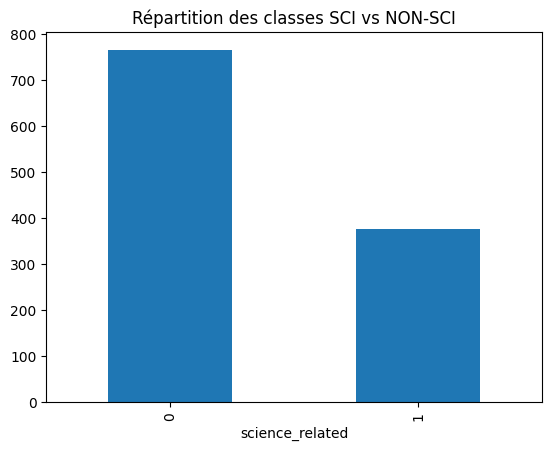

In [ ]:
df['science_related'].value_counts().plot(kind='bar', title="Répartition des classes SCI vs NON-SCI")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille du jeu de test : {X_test.shape[0]} échantillons")


Taille du jeu d'entraînement : 912 échantillons
Taille du jeu de test : 228 échantillons



Naïve Bayes - Accuracy : 0.69
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       153
           1       1.00      0.07      0.12        75

    accuracy                           0.69       228
   macro avg       0.84      0.53      0.47       228
weighted avg       0.79      0.69      0.59       228

[[153   0]
 [ 70   5]]


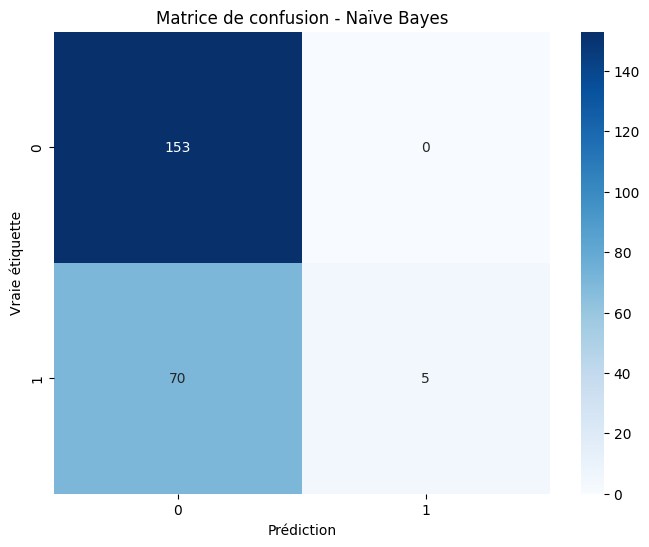

--------------------------------------------------

Logistic Regression - Accuracy : 0.76
              precision    recall  f1-score   support

           0       0.74      0.98      0.85       153
           1       0.88      0.31      0.46        75

    accuracy                           0.76       228
   macro avg       0.81      0.64      0.65       228
weighted avg       0.79      0.76      0.72       228

[[150   3]
 [ 52  23]]


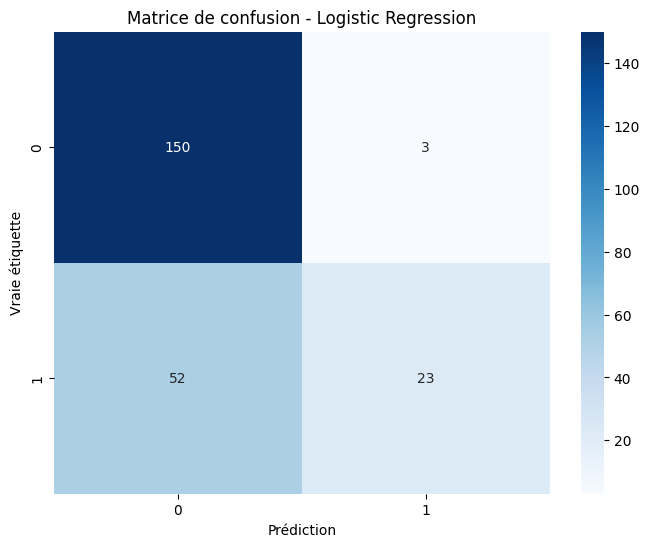

--------------------------------------------------

Random Forest - Accuracy : 0.77
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       153
           1       1.00      0.29      0.45        75

    accuracy                           0.77       228
   macro avg       0.87      0.65      0.65       228
weighted avg       0.83      0.77      0.72       228

[[153   0]
 [ 53  22]]


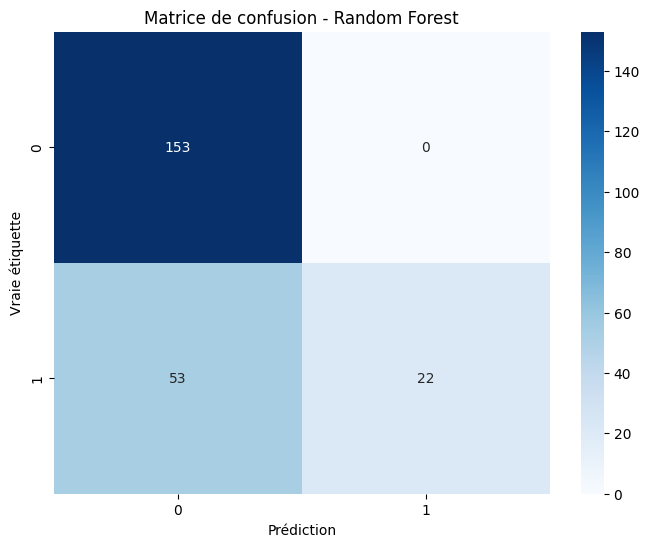

--------------------------------------------------

SVM sans params - Accuracy : 0.69
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       153
           1       0.83      0.07      0.12        75

    accuracy                           0.69       228
   macro avg       0.76      0.53      0.47       228
weighted avg       0.73      0.69      0.58       228

[[152   1]
 [ 70   5]]


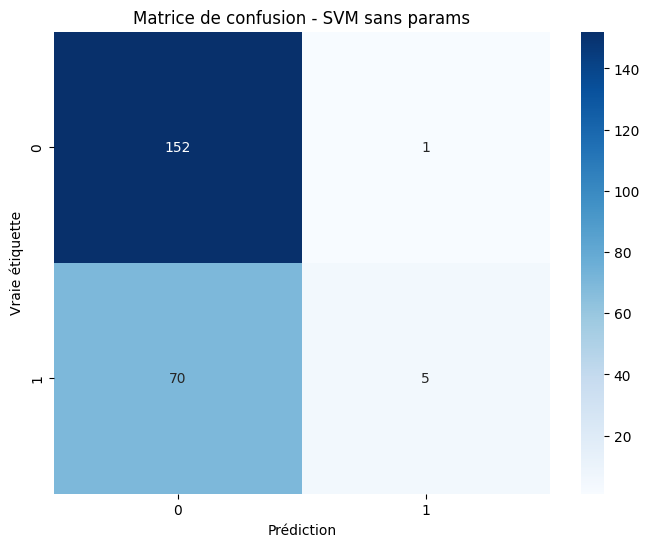

--------------------------------------------------

SVM linear - Accuracy : 0.83
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       153
           1       0.89      0.55      0.68        75

    accuracy                           0.83       228
   macro avg       0.85      0.76      0.78       228
weighted avg       0.84      0.83      0.82       228

[[148   5]
 [ 34  41]]


--------------------------------------------------

SVM poly - Accuracy : 0.75
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       153
           1       0.95      0.24      0.38        75

    accuracy                           0.75       228
   macro avg       0.84      0.62      0.61       228
weighted avg       0.80      0.75      0.69       228

[[152   1]
 [ 57  18]]


--------------------------------------------------

SVM rbf - Accuracy : 0.69
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       153
           1       0.83      0.07      0.12        75

    accuracy                           0.69       228
   macro avg       0.76      0.53      0.47       228
weighted avg       0.73      0.69      0.58       228

[[152   1]
 [ 70   5]]


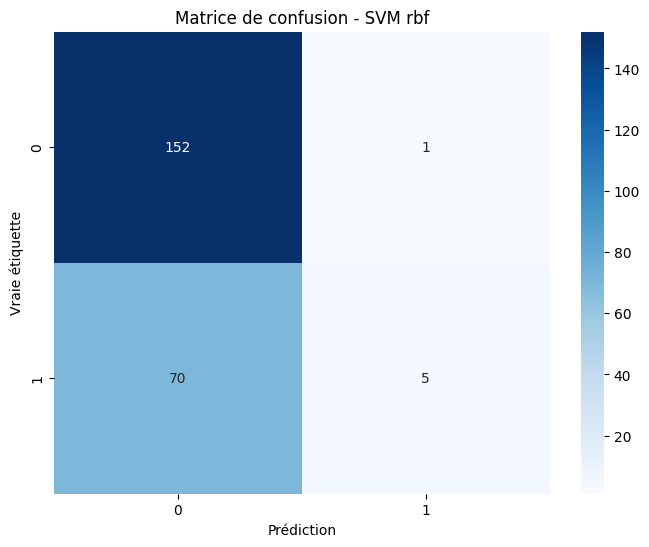

--------------------------------------------------

SVM sigmoid - Accuracy : 0.70
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       153
           1       0.55      0.41      0.47        75

    accuracy                           0.70       228
   macro avg       0.65      0.62      0.63       228
weighted avg       0.68      0.70      0.68       228

[[128  25]
 [ 44  31]]


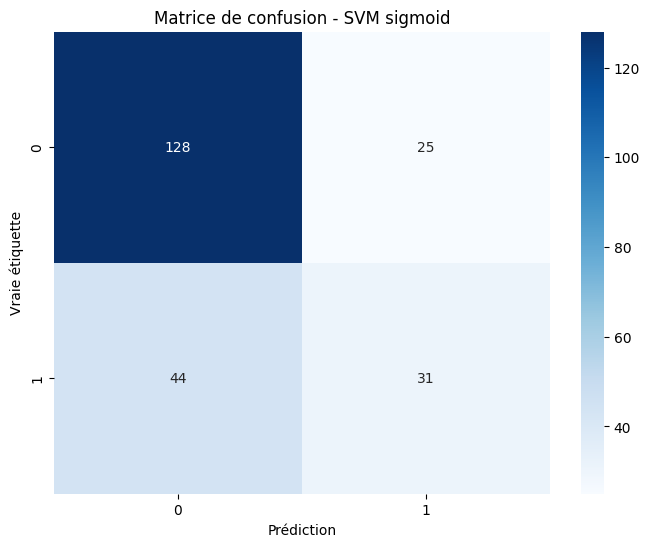

--------------------------------------------------

Decision Tree - Accuracy : 0.80
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       153
           1       0.74      0.60      0.66        75

    accuracy                           0.80       228
   macro avg       0.78      0.75      0.76       228
weighted avg       0.79      0.80      0.79       228

[[137  16]
 [ 30  45]]


--------------------------------------------------

K-Nearest Neighbors sans param - Accuracy : 0.78
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       153
           1       0.69      0.59      0.63        75

    accuracy                           0.78       228
   macro avg       0.75      0.73      0.74       228
weighted avg       0.77      0.78      0.77       228

[[133  20]
 [ 31  44]]


--------------------------------------------------

K-Nearest Neighbors - Accuracy : 0.78
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       153
           1       0.69      0.59      0.63        75

    accuracy                           0.78       228
   macro avg       0.75      0.73      0.74       228
weighted avg       0.77      0.78      0.77       228

[[133  20]
 [ 31  44]]


--------------------------------------------------

AdaBoost - Accuracy : 0.76
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       153
           1       0.76      0.41      0.53        75

    accuracy                           0.76       228
   macro avg       0.76      0.67      0.69       228
weighted avg       0.76      0.76      0.74       228

[[143  10]
 [ 44  31]]


--------------------------------------------------

XGBoost sans params - Accuracy : 0.82
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       153
           1       0.80      0.63      0.70        75

    accuracy                           0.82       228
   macro avg       0.82      0.77      0.79       228
weighted avg       0.82      0.82      0.82       228

[[141  12]
 [ 28  47]]


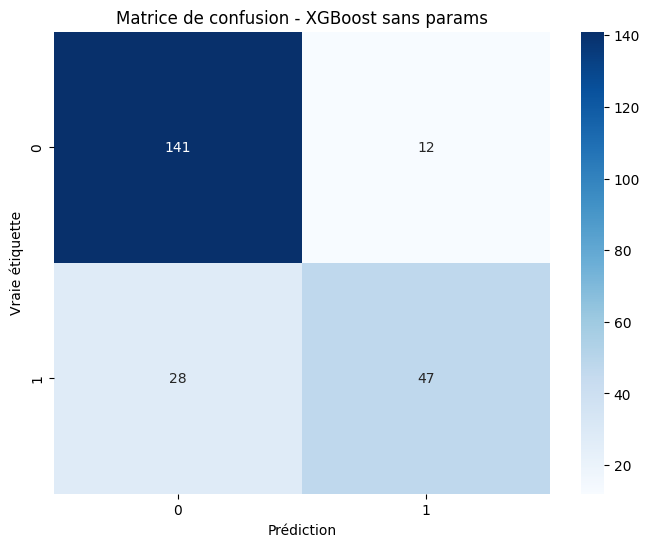

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy : 0.82
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       153
           1       0.80      0.63      0.70        75

    accuracy                           0.82       228
   macro avg       0.82      0.77      0.79       228
weighted avg       0.82      0.82      0.82       228

[[141  12]
 [ 28  47]]


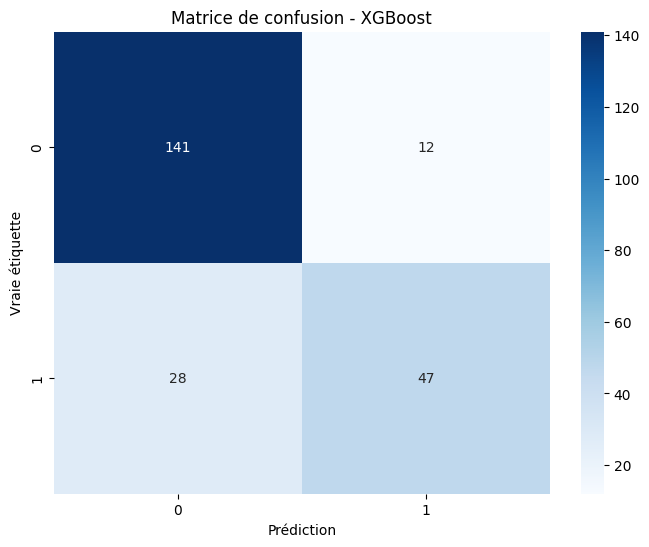

--------------------------------------------------

Neural Network - MLP sans params - Accuracy : 0.82
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       153
           1       0.79      0.60      0.68        75

    accuracy                           0.82       228
   macro avg       0.81      0.76      0.78       228
weighted avg       0.81      0.82      0.81       228

[[141  12]
 [ 30  45]]


--------------------------------------------------

Neural Network - MLP - Accuracy : 0.82
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       153
           1       0.80      0.59      0.68        75

    accuracy                           0.82       228
   macro avg       0.81      0.76      0.77       228
weighted avg       0.81      0.82      0.81       228

[[142  11]
 [ 31  44]]


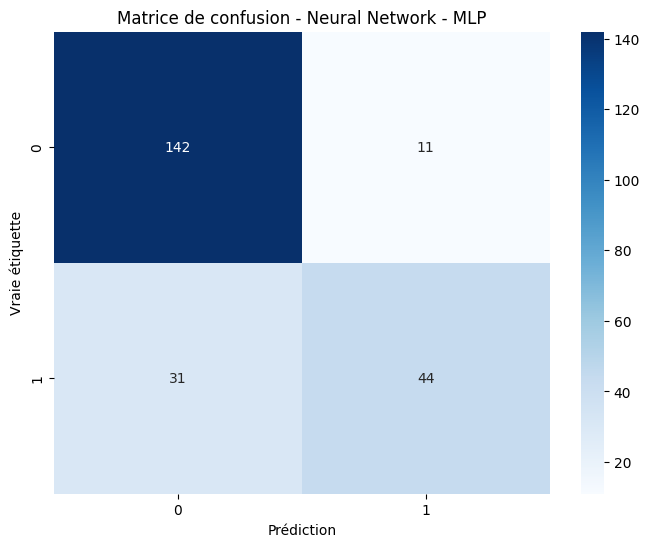

--------------------------------------------------


<Figure size 1200x600 with 0 Axes>

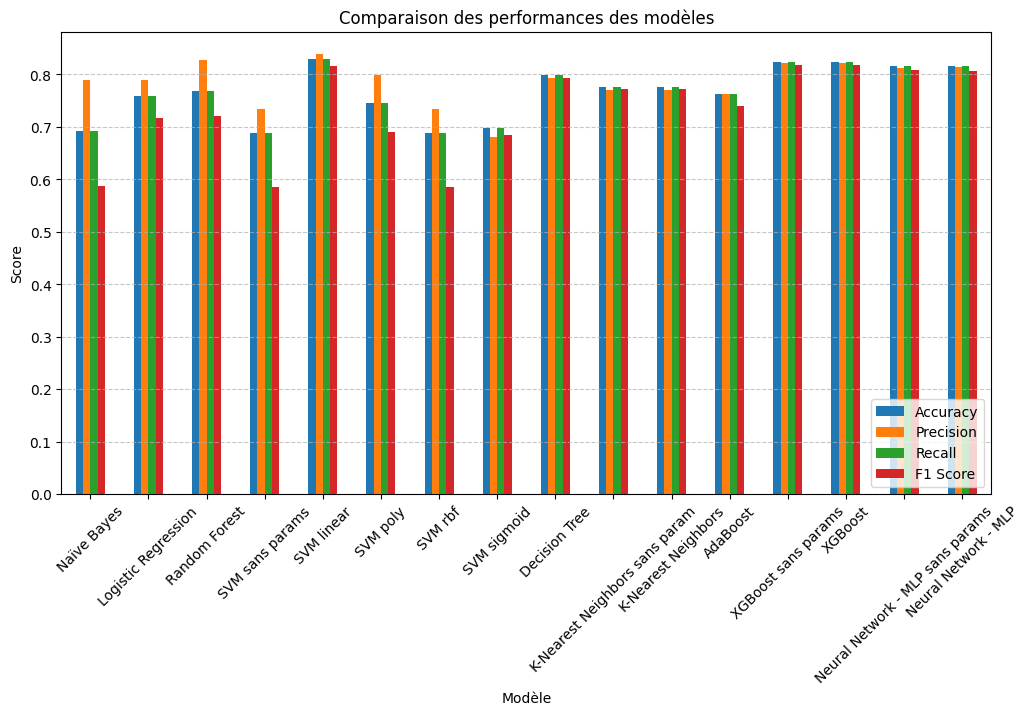

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

scores = {}

models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM sans params": SVC(),
    "SVM linear": SVC(kernel='linear'),
    "SVM poly": SVC(kernel='poly'),
    "SVM rbf": SVC(kernel='rbf'),
    "SVM sigmoid": SVC(kernel='sigmoid'),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors sans param": KNeighborsClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost sans params": XGBClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network - MLP sans params": MLPClassifier(),
    "Neural Network - MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    scores[name] = {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1}

    print(f"\n{name} - Accuracy : {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.show()

    print("-" * 50)

df_scores = pd.DataFrame(scores).T
# Affichage des scores sous forme de barres
plt.figure(figsize=(12, 6))
df_scores.plot(kind='bar', figsize=(12, 6))
plt.title("Comparaison des performances des modèles")
plt.xlabel("Modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [ ]:
df.head()

Unnamed: 0            tweet_id  \
0           0  316669998137483264   
1           1  319090866545385472   
2           2  322030931022065664   
3           3  322694830620807168   
4           4  328524426658328576   

                                                text  science_related  \
0  Knees are a bit sore. i guess that's a sign th...                0   
1  McDonald's breakfast stop then the gym :basket...                0   
2  Can any Gynecologist with Cancer Experience ex...                1   
3  Couch-lock highs lead to sleeping in the couch...                1   
4  Does daily routine help prevent problems with ...                1   

   scientific_claim  scientific_reference  scientific_context  has_url  \
0               0.0                   0.0                 0.0    False   
1               0.0                   0.0                 0.0    False   
2               1.0                   0.0                 0.0    False   
3               1.0                   0.0                 0.0    False   
4               1.0                   0.0                 0.0     True   

   has_mention  has_hashtag  has_emoji  has_url_tweet  \
0        False        False      False          False   
1        False        False       True          False   
2        False         True      False          False   
3        False        False      False          False   
4        False        False      False           True   

                                          text_clean  
0  knees are a bit sore i guess thats a sign that...  
1  mcdonalds breakfast stop then the gym :basketb...  
2  can any gynecologist with cancer experience ex...  
3  couchlock highs lead to sleeping in the couch ...  
4  does daily routine help prevent problems with ...

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Accuracy : {accuracy_score(y_test, y_pred):.2f}")


Naïve Bayes - Accuracy : 0.69

Logistic Regression - Accuracy : 0.71

Random Forest - Accuracy : 0.73

SVM sans params - Accuracy : 0.71

SVM - Accuracy : 0.81

Decision Tree - Accuracy : 0.74

K-Nearest Neighbors sans param - Accuracy : 0.75

K-Nearest Neighbors - Accuracy : 0.75

AdaBoost - Accuracy : 0.76

XGBoost sans params - Accuracy : 0.82


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:17:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy : 0.82

Neural Network - MLP sans params - Accuracy : 0.79

Neural Network - MLP - Accuracy : 0.79


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Accuracy : {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision : {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall : {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score : {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("-----------------------------------------")


Naïve Bayes - Accuracy : 0.69
Precision : 0.79
Recall : 0.69
F1 Score : 0.59
-----------------------------------------

Logistic Regression - Accuracy : 0.76
Precision : 0.79
Recall : 0.76
F1 Score : 0.72
-----------------------------------------

Random Forest - Accuracy : 0.75
Precision : 0.82
Recall : 0.75
F1 Score : 0.69
-----------------------------------------

SVM sans params - Accuracy : 0.69
Precision : 0.73
Recall : 0.69
F1 Score : 0.58
-----------------------------------------

SVM linear - Accuracy : 0.83
Precision : 0.84
Recall : 0.83
F1 Score : 0.82
-----------------------------------------

SVM poly - Accuracy : 0.75
Precision : 0.80
Recall : 0.75
F1 Score : 0.69
-----------------------------------------

SVM rbf - Accuracy : 0.69
Precision : 0.73
Recall : 0.69
F1 Score : 0.58
-----------------------------------------

SVM sigmoid - Accuracy : 0.70
Precision : 0.68
Recall : 0.70
F1 Score : 0.68
-----------------------------------------

Decision Tree - Accuracy : 0.79
P

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:25:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy : 0.82
Precision : 0.82
Recall : 0.82
F1 Score : 0.82
-----------------------------------------

Neural Network - MLP sans params - Accuracy : 0.82
Precision : 0.81
Recall : 0.82
F1 Score : 0.81
-----------------------------------------

Neural Network - MLP - Accuracy : 0.82
Precision : 0.81
Recall : 0.82
F1 Score : 0.81
-----------------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Meilleurs paramètres SVM :", grid_svm.best_params_)
print("Meilleure accuracy :", grid_svm.best_score_)
print("Meilleur F1 Score (val. croisée) :", grid_svm.best_score_)


Meilleurs paramètres SVM : {'C': 10, 'kernel': 'linear'}
Meilleure accuracy : 0.7857557896168279
Meilleur F1 Score (val. croisée) : 0.7857557896168279


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the Result class to store evaluation results
class Result:
    def __init__(self, name, params, scoremean, stdresult, timespent, precision, recall, f1):
        self.name = name
        self.params = params
        self.scoremean = scoremean
        self.stdresult = stdresult
        self.timespent = timespent
        self.precision = precision
        self.recall = recall
        self.f1 = f1

def test_svm_hyperparameters(X, y, param_grid, text_column=None):
    """
    Test different hyperparameters for SVM classifier and determine the best configuration.

    Parameters:
    -----------
    X : array-like or pd.Series
        Features for classification. If text_column is provided, this should be a pandas Series or list of text.
        Otherwise, it should be preprocessed feature vectors.
    y : array-like
        Target labels for classification.
    param_grid : dict
        Dictionary of SVM parameters to test. Each key is a parameter name, and each value is a list of
        values to test for that parameter. Example:
        {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto', 0.1, 0.01]
        }
    text_column : bool, optional
        If True, X is treated as text data and TF-IDF vectorization is applied. Default is None.

    Returns:
    --------
    allresults : list
        List of Result objects containing evaluation metrics for each parameter combination,
        sorted by accuracy score in descending order.
    """
    seed = 7
    allresults = []

    # Prepare scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # Generate all parameter combinations
    param_combinations = []
    param_names = list(param_grid.keys())

    def generate_combinations(current_combo, index):
        if index == len(param_names):
            param_combinations.append(current_combo.copy())
            return

        param_name = param_names[index]
        param_values = param_grid[param_name]

        for value in param_values:
            current_combo[param_name] = value
            generate_combinations(current_combo, index + 1)

    generate_combinations({}, 0)

    # Create cross-validation object
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Test each parameter combination
    for i, params in enumerate(param_combinations):
        # Create model name based on parameters
        model_name = "SVM"
        for param, value in params.items():
            model_name += f"_{param}={value}"

        print(f"Evaluating {model_name} ({i+1}/{len(param_combinations)})")

        # Create the SVM classifier with current parameters
        if text_column is not None:
            # Create a pipeline with TF-IDF and SVM
            model = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=5000)),
                ('svm', SVC(**params))
            ])
        else:
            # Use SVM directly on preprocessed features
            model = SVC(**params)

        # Perform cross-validation
        start_time = time.time()
        cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
        thetime = time.time() - start_time

        # Store results
        result = Result(
            name=model_name,
            params=str(params),
            scoremean=cv_results['test_accuracy'].mean(),
            stdresult=cv_results['test_accuracy'].std(),
            timespent=thetime,
            precision=cv_results['test_precision'].mean(),
            recall=cv_results['test_recall'].mean(),
            f1=cv_results['test_f1'].mean()
        )

        allresults.append(result)

        # Print current results
        print(f"  Accuracy: {result.scoremean:.3f} (±{result.stdresult:.3f})")
        print(f"  Precision: {result.precision:.3f}, Recall: {result.recall:.3f}, F1: {result.f1:.3f}")
        print(f"  Time: {thetime:.3f}s\n")

    # Sort results by accuracy score
    allresults = sorted(allresults, key=lambda result: result.scoremean, reverse=True)

    # Print all results
    print('\nAll Results (sorted by accuracy):')
    print('=' * 80)
    for i, result in enumerate(allresults):
        print(f"{i+1}. {result.name}")
        print(f"   Parameters: {result.params}")
        print(f"   Accuracy: {result.scoremean:.3f} (±{result.stdresult:.3f})")
        print(f"   Precision: {result.precision:.3f}, Recall: {result.recall:.3f}, F1: {result.f1:.3f}")
        print(f"   Time: {result.timespent:.3f}s")
        print('-' * 80)

    # Print best result
    print('\nBest Result:')
    print('=' * 80)
    print(f"Model: {allresults[0].name}")
    print(f"Parameters: {allresults[0].params}")
    print(f"Accuracy: {allresults[0].scoremean:.3f} (±{allresults[0].stdresult:.3f})")
    print(f"Precision: {allresults[0].precision:.3f}, Recall: {allresults[0].recall:.3f}, F1: {allresults[0].f1:.3f}")
    print(f"Time: {allresults[0].timespent:.3f}s")

    # Save results to CSV
    save_results_to_csv(allresults, 'svm_hyperparameter_results.csv')

    return allresults

def save_results_to_csv(allresults, filename='svm_hyperparameter_results.csv'):
    """Save the results to a CSV file."""
    data = {
        'Model Name': [result.name for result in allresults],
        'Parameters': [result.params for result in allresults],
        'Accuracy': [result.scoremean for result in allresults],
        'Std Dev': [result.stdresult for result in allresults],
        'Precision': [result.precision for result in allresults],
        'Recall': [result.recall for result in allresults],
        'F1 Score': [result.f1 for result in allresults],
        'Execution Time (s)': [result.timespent for result in allresults]
    }

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f'\nResults saved to {filename}')

# Example usage
def main():
    # Load data
    file_path = "scitweets_export.tsv"
    df = pd.read_csv(file_path, sep='\t')

    # Assuming 'text' is the column with tweet content and 'label' is the target
    X = df['text_clean']  # Replace with your actual text column name
    y = df['science_related']  # Replace with your actual label column name

    # Define parameter grid to test
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Run hyperparameter testing
    results = test_svm_hyperparameters(X, y, param_grid, text_column=True)

    return results

main()

Evaluating SVM_C=0.1_kernel=linear_gamma=scale (1/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 1.122s

Evaluating SVM_C=0.1_kernel=linear_gamma=auto (2/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 1.132s

Evaluating SVM_C=0.1_kernel=rbf_gamma=scale (3/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 1.287s

Evaluating SVM_C=0.1_kernel=rbf_gamma=auto (4/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 0.944s

Evaluating SVM_C=1_kernel=linear_gamma=scale (5/16)
  Accuracy: 0.809 (±0.016)
  Precision: 0.806, Recall: 0.809, F1: 0.804
  Time: 1.199s

Evaluating SVM_C=1_kernel=linear_gamma=auto (6/16)
  Accuracy: 0.809 (±0.016)
  Precision: 0.806, Recall: 0.809, F1: 0.804
  Time: 1.214s

Evaluating SVM_C=1_kernel=rbf_gamma=scale (7/16)
  Accuracy: 0.773 (±0.017)
  Precision: 0.787, Recall: 0.773, F1: 0.745
  Time: 1.846s

Evaluating SVM_C=1_kernel=rbf_gamma=auto (8/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 1.308s

Evaluating SVM_C=10_kernel=linear_gamma=scale (9/16)
  Accuracy: 0.798 (±0.011)
  Precision: 0.800, Recall: 0.798, F1: 0.798
  Time: 1.495s

Evaluating SVM_C=10_kernel=linear_gamma=auto (10/16)
  Accuracy: 0.798 (±0.011)
  Precision: 0.800, Recall: 0.798, F1: 0.798
  Time: 1.270s

Evaluating SVM_C=10_kernel=rbf_gamma=scale (11/16)
  Accuracy: 0.806 (±0.023)
  Precision: 0.805, Recall: 0.806, F1: 0.796
  Time: 1.290s

Evaluating SVM_C=10_kernel=rbf_gamma=auto (12/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 1.076s

Evaluating SVM_C=100_kernel=linear_gamma=scale (13/16)
  Accuracy: 0.798 (±0.011)
  Precision: 0.800, Recall: 0.798, F1: 0.798
  Time: 1.229s

Evaluating SVM_C=100_kernel=linear_gamma=auto (14/16)
  Accuracy: 0.798 (±0.011)
  Precision: 0.800, Recall: 0.798, F1: 0.798
  Time: 1.232s

Evaluating SVM_C=100_kernel=rbf_gamma=scale (15/16)
  Accuracy: 0.806 (±0.023)
  Precision: 0.805, Recall: 0.806, F1: 0.796
  Time: 1.303s

Evaluating SVM_C=100_kernel=rbf_gamma=auto (16/16)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

  Accuracy: 0.671 (±0.026)
  Precision: 0.451, Recall: 0.671, F1: 0.539
  Time: 1.130s


All Results (sorted by accuracy):
1. SVM_C=1_kernel=linear_gamma=scale
   Parameters: {'C': 1, 'kernel': 'linear', 'gamma': 'scale'}
   Accuracy: 0.809 (±0.016)
   Precision: 0.806, Recall: 0.809, F1: 0.804
   Time: 1.199s
--------------------------------------------------------------------------------
2. SVM_C=1_kernel=linear_gamma=auto
   Parameters: {'C': 1, 'kernel': 'linear', 'gamma': 'auto'}
   Accuracy: 0.809 (±0.016)
   Precision: 0.806, Recall: 0.809, F1: 0.804
   Time: 1.214s
--------------------------------------------------------------------------------
3. SVM_C=10_kernel=rbf_gamma=scale
   Parameters: {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
   Accuracy: 0.806 (±0.023)
   Precision: 0.805, Recall: 0.806, F1: 0.796
   Time: 1.290s
--------------------------------------------------------------------------------
4. SVM_C=100_kernel=rbf_gamma=scale
   Parameters: {'C': 100, 'kernel': '

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Meilleurs paramètres XGBoost :", grid_xgb.best_params_)
print("Meilleure accuracy :", grid_xgb.best_score_)
print("Meilleur F1 Score (val. croisée) :", grid_xgb.best_score_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:38:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs paramètres XGBoost : {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Meilleure accuracy : 0.7785843947388598
Meilleur F1 Score (val. croisée) : 0.7785843947388598


In [ ]:
from sklearn.neural_network import MLPClassifier

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=500),
                        param_grid_mlp, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("Meilleurs paramètres MLP :", grid_mlp.best_params_)
print("Meilleur F1 Score (val. croisée) :", grid_mlp.best_score_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Dictionnaire des modèles et des hyperparamètres à tester
param_grid = {
    "SVM": {
        "model": SVC(),
        "params": {
            "kernel": ["linear", "rbf", "poly"],
            "C": [0.1, 1, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(max_iter=500),
        "params": {
            "hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "activation": ["relu", "tanh"],
            "alpha": [0.0001, 0.001]
        }
    }
}

# Exécution de GridSearchCV pour chaque modèle
for name, config in param_grid.items():
    print(f"\n🔍 Optimisation des hyperparamètres pour {name}...")
    grid_search = GridSearchCV(config["model"], config["params"], cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"✅ Meilleur score : {grid_search.best_score_:.2f}")
    print(f"📌 Meilleurs paramètres : {grid_search.best_params_}")

    # Évaluer le meilleur modèle sur les données de test
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"📊 Accuracy sur test : {test_accuracy:.2f}\n")



🔍 Optimisation des hyperparamètres pour SVM...
✅ Meilleur score : 0.78
📌 Meilleurs paramètres : {'C': 1, 'kernel': 'linear'}
📊 Accuracy sur test : 0.83


🔍 Optimisation des hyperparamètres pour Random Forest...
✅ Meilleur score : 0.73
📌 Meilleurs paramètres : {'max_depth': None, 'n_estimators': 50}
📊 Accuracy sur test : 0.76


🔍 Optimisation des hyperparamètres pour KNN...
✅ Meilleur score : 0.71
📌 Meilleurs paramètres : {'n_neighbors': 7, 'weights': 'distance'}
📊 Accuracy sur test : 0.80


🔍 Optimisation des hyperparamètres pour XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Meilleur score : 0.77
📌 Meilleurs paramètres : {'learning_rate': 0.1, 'n_estimators': 50}
📊 Accuracy sur test : 0.81


🔍 Optimisation des hyperparamètres pour Neural Network...


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(eval_metric="logloss"),
    param_distributions=xgb_params,
    n_iter=20,  # Nombre d'essais, tu peux augmenter
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

xgb_search.fit(X_train, y_train)

print(f"Meilleurs paramètres XGBoost : {xgb_search.best_params_}")
print(f"Meilleur score : {xgb_search.best_score_:.2f}")


Meilleurs paramètres XGBoost : {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Meilleur score : 0.77


In [ ]:
from sklearn.model_selection import cross_val_score

best_xgb = xgb_search.best_estimator_
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Scores CV : {cv_scores}")
print(f"Moyenne Accuracy CV : {cv_scores.mean():.2f}")


Scores CV : [0.73770492 0.80327869 0.76923077 0.77472527 0.75824176]
Moyenne Accuracy CV : 0.77


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score : {roc_auc:.2f}")


ROC AUC Score : 0.89
